<a href="https://colab.research.google.com/github/Uditi26/Machine-Learning/blob/main/1BM21CS260_ML_Lab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset generation**

In [3]:
import numpy as np
import pandas as pd

# Define the number of samples per genre
num_samples = 50

# Simulate features for Pop songs
pop_tempo = np.random.normal(loc=120, scale=10, size=num_samples)
pop_key = np.random.randint(0, 12, size=num_samples)
pop_rhythm = np.random.normal(loc=5, scale=1, size=num_samples)
pop_instrumentation = np.random.randint(1, 5, size=num_samples)
pop_genre = ['Pop'] * num_samples

# Simulate features for Rock songs
rock_tempo = np.random.normal(loc=140, scale=15, size=num_samples)
rock_key = np.random.randint(0, 12, size=num_samples)
rock_rhythm = np.random.normal(loc=7, scale=1.5, size=num_samples)
rock_instrumentation = np.random.randint(3, 7, size=num_samples)
rock_genre = ['Rock'] * num_samples

# Simulate features for Hip-Hop songs
hiphop_tempo = np.random.normal(loc=90, scale=5, size=num_samples)
hiphop_key = np.random.randint(0, 12, size=num_samples)
hiphop_rhythm = np.random.normal(loc=4, scale=1, size=num_samples)
hiphop_instrumentation = np.random.randint(2, 5, size=num_samples)
hiphop_genre = ['Hip-Hop'] * num_samples

# Combine the data
data = {
    'tempo': np.concatenate([pop_tempo, rock_tempo, hiphop_tempo]),
    'key': np.concatenate([pop_key, rock_key, hiphop_key]),
    'rhythm': np.concatenate([pop_rhythm, rock_rhythm, hiphop_rhythm]),
    'instrumentation': np.concatenate([pop_instrumentation, rock_instrumentation, hiphop_instrumentation]),
    'genre': np.concatenate([pop_genre, rock_genre, hiphop_genre])
}

# Create a DataFrame
df = pd.DataFrame(data)

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the DataFrame
print(df.head())


        tempo  key    rhythm  instrumentation    genre
0  107.837279    9  3.468159                3      Pop
1  150.290885    8  8.578565                5     Rock
2  122.587049    5  5.585295                4     Rock
3   89.099864    5  3.550976                4  Hip-Hop
4  150.643989    2  6.949167                4     Rock


**Classification using ID3 algorithm**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Split the data into features (X) and target (y)
X = df[['tempo', 'key', 'rhythm', 'instrumentation']]
y = df['genre']


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [39]:
# Create the decision tree classifier with Gini index
clf = DecisionTreeClassifier(criterion='gini', random_state=0)


In [40]:

# Train the classifier
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [46]:

# Make predictions on the test set
y_pred = clf.predict(X_test)
#Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
conf_matrix_dt = confusion_matrix(y_test, y_pred)
class_report_dt = classification_report(y_test, y_pred)
print(f'Decision Tree Classifier Accuracy: {accuracy_dt * 100:.2f}%')
print('Decision Tree Classifier Confusion Matrix:')
print(conf_matrix_dt)
print('Decision Tree Classifier Classification Report:')
print(class_report_dt)


Decision Tree Classifier Accuracy: 90.00%
Decision Tree Classifier Confusion Matrix:
[[15  1  0]
 [ 0 15  2]
 [ 0  2 15]]
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

     Hip-Hop       1.00      0.94      0.97        16
         Pop       0.83      0.88      0.86        17
        Rock       0.88      0.88      0.88        17

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



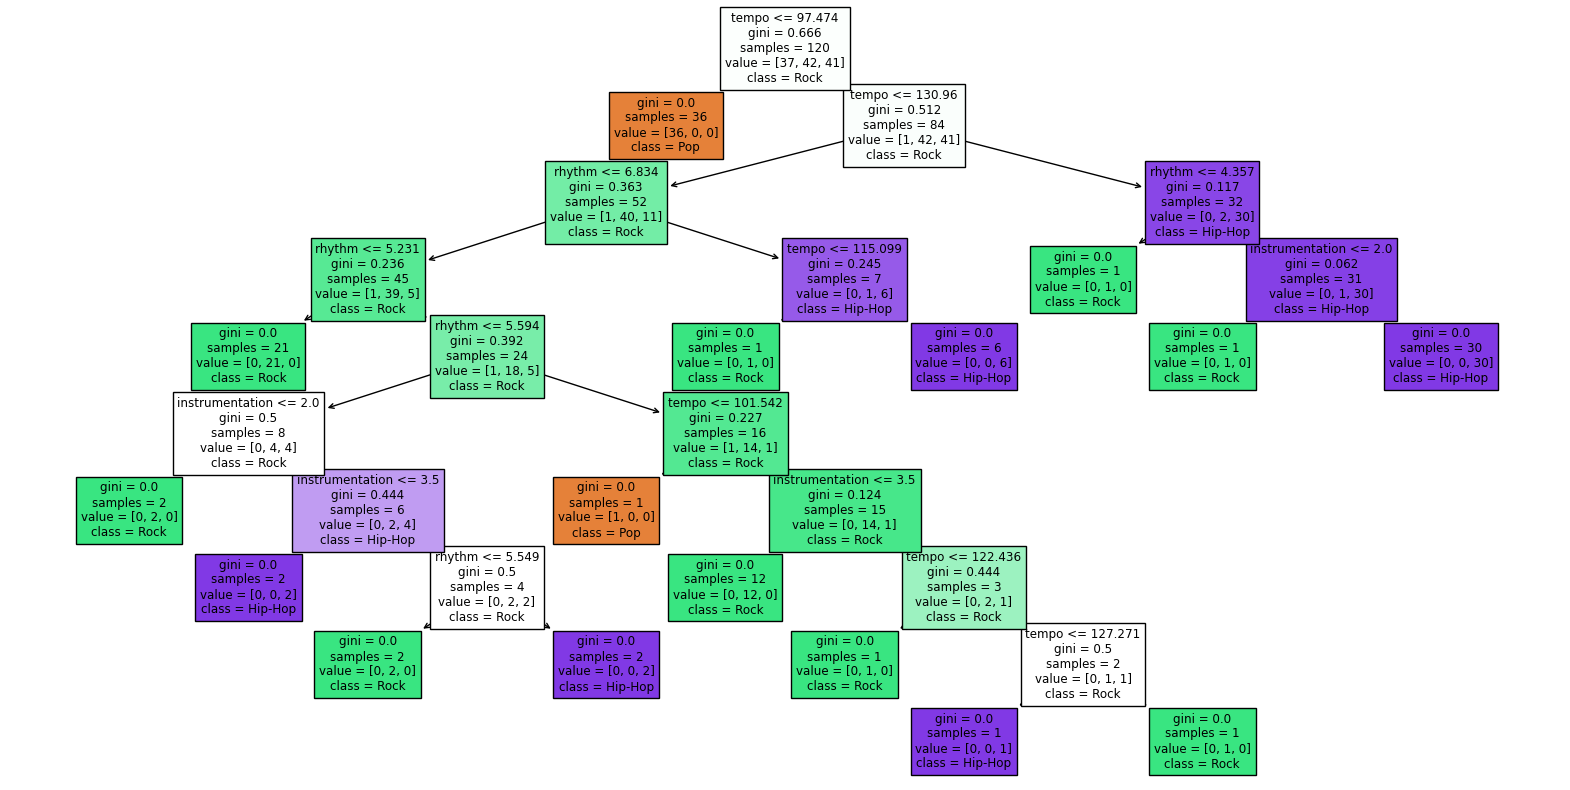

In [12]:
# Optionally, visualize the decision tree (requires graphviz)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['tempo', 'key', 'rhythm', 'instrumentation'], class_names=['Pop', 'Rock', 'Hip-Hop'])
plt.show()

**Classification Using KNN**

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print(f'KNN Classifier Accuracy: {accuracy_knn * 100:.2f}%')
print('KNN Classifier Confusion Matrix:')
print(conf_matrix_knn)
print('KNN Classifier Classification Report:')
print(class_report_knn)


KNN Classifier Accuracy: 88.89%
KNN Classifier Confusion Matrix:
[[12  0  0]
 [ 1 14  2]
 [ 0  2 14]]
KNN Classifier Classification Report:
              precision    recall  f1-score   support

     Hip-Hop       0.92      1.00      0.96        12
         Pop       0.88      0.82      0.85        17
        Rock       0.88      0.88      0.88        16

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.89      0.89      0.89        45



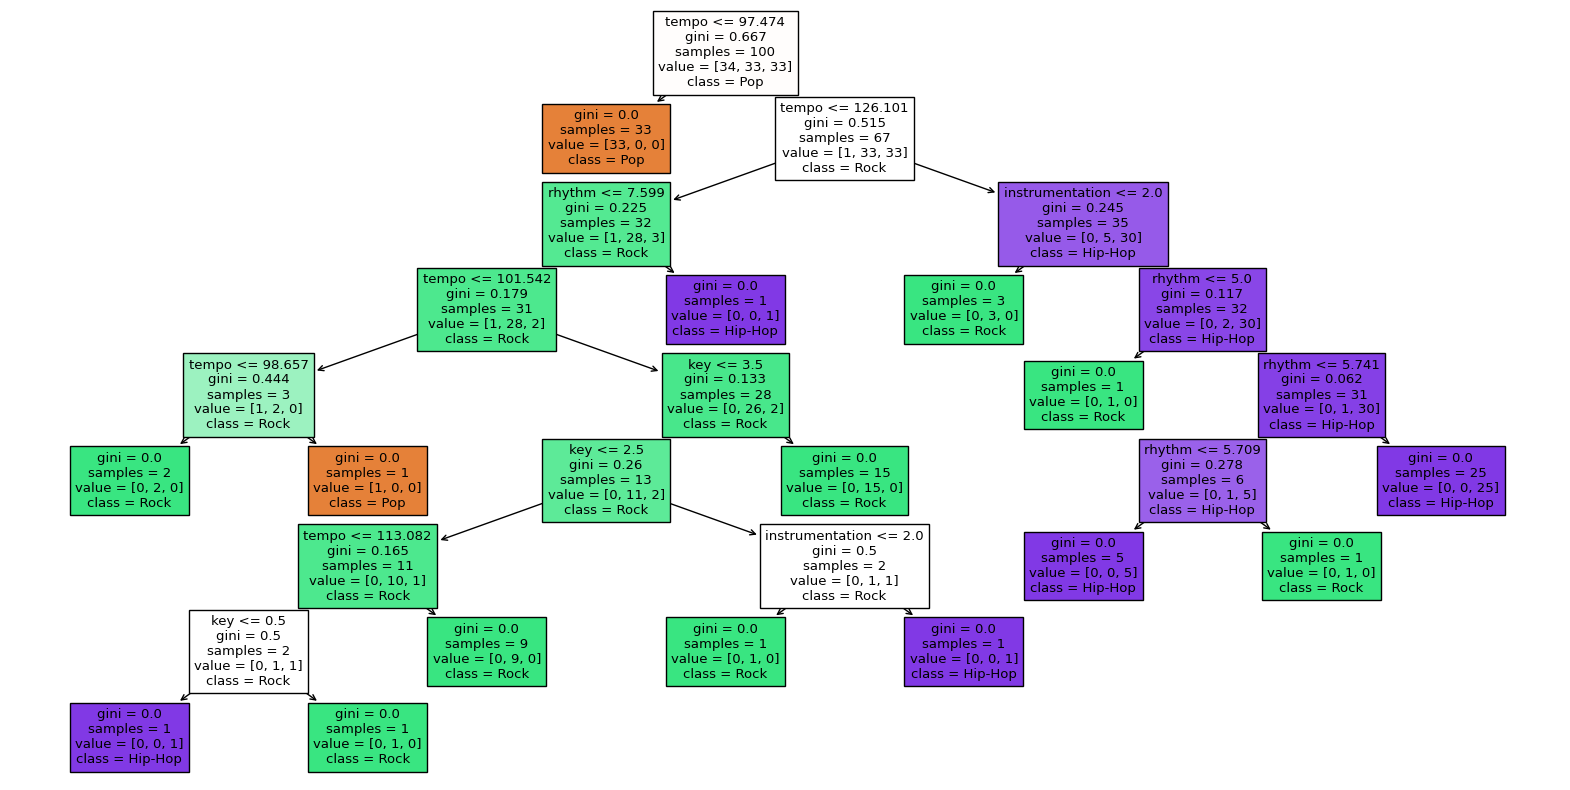

In [35]:
# Optionally, visualize the decision tree (requires graphviz)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=['tempo', 'key', 'rhythm', 'instrumentation'], class_names=['Pop', 'Rock', 'Hip-Hop'])
plt.show()

**Comparision between KNN and ID3**

**As we can see from the accuracy rates above,**

---


ID3 = 90%

---


KNN = 88.3%